In [1]:
import pandas as pd
df=pd.read_csv('Boston_crime.csv')

In [1]:
df.dropna()
df.head()

NameError: name 'df' is not defined

In [203]:
df['UCR_PART'].nunique()
df2=df[['Lat','Long','HOUR','UCR_PART']]

In [204]:
df_independent = df[['Lat', 'Long' ,'HOUR']]
df_dependent=df[['UCR_PART']]

In [205]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_independent, df_dependent, test_size=0.30)

In [206]:
from sklearn.tree import DecisionTreeClassifier
dtreesimple = DecisionTreeClassifier()

In [207]:
dtreesimple.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [208]:
predictions = dtreesimple.predict(X_test)

In [209]:
from sklearn.metrics import classification_report,confusion_matrix

In [210]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Part One       0.33      0.39      0.36        31
  Part Three       0.50      0.43      0.46        72
    Part Two       0.23      0.26      0.24        39

    accuracy                           0.37       142
   macro avg       0.35      0.36      0.35       142
weighted avg       0.39      0.37      0.38       142



In [211]:
print(confusion_matrix(y_test,predictions))

[[12  9 10]
 [17 31 24]
 [ 7 22 10]]


In [212]:
#!pip install pydot
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df_independent.columns)
features

['Lat', 'Long', 'HOUR']

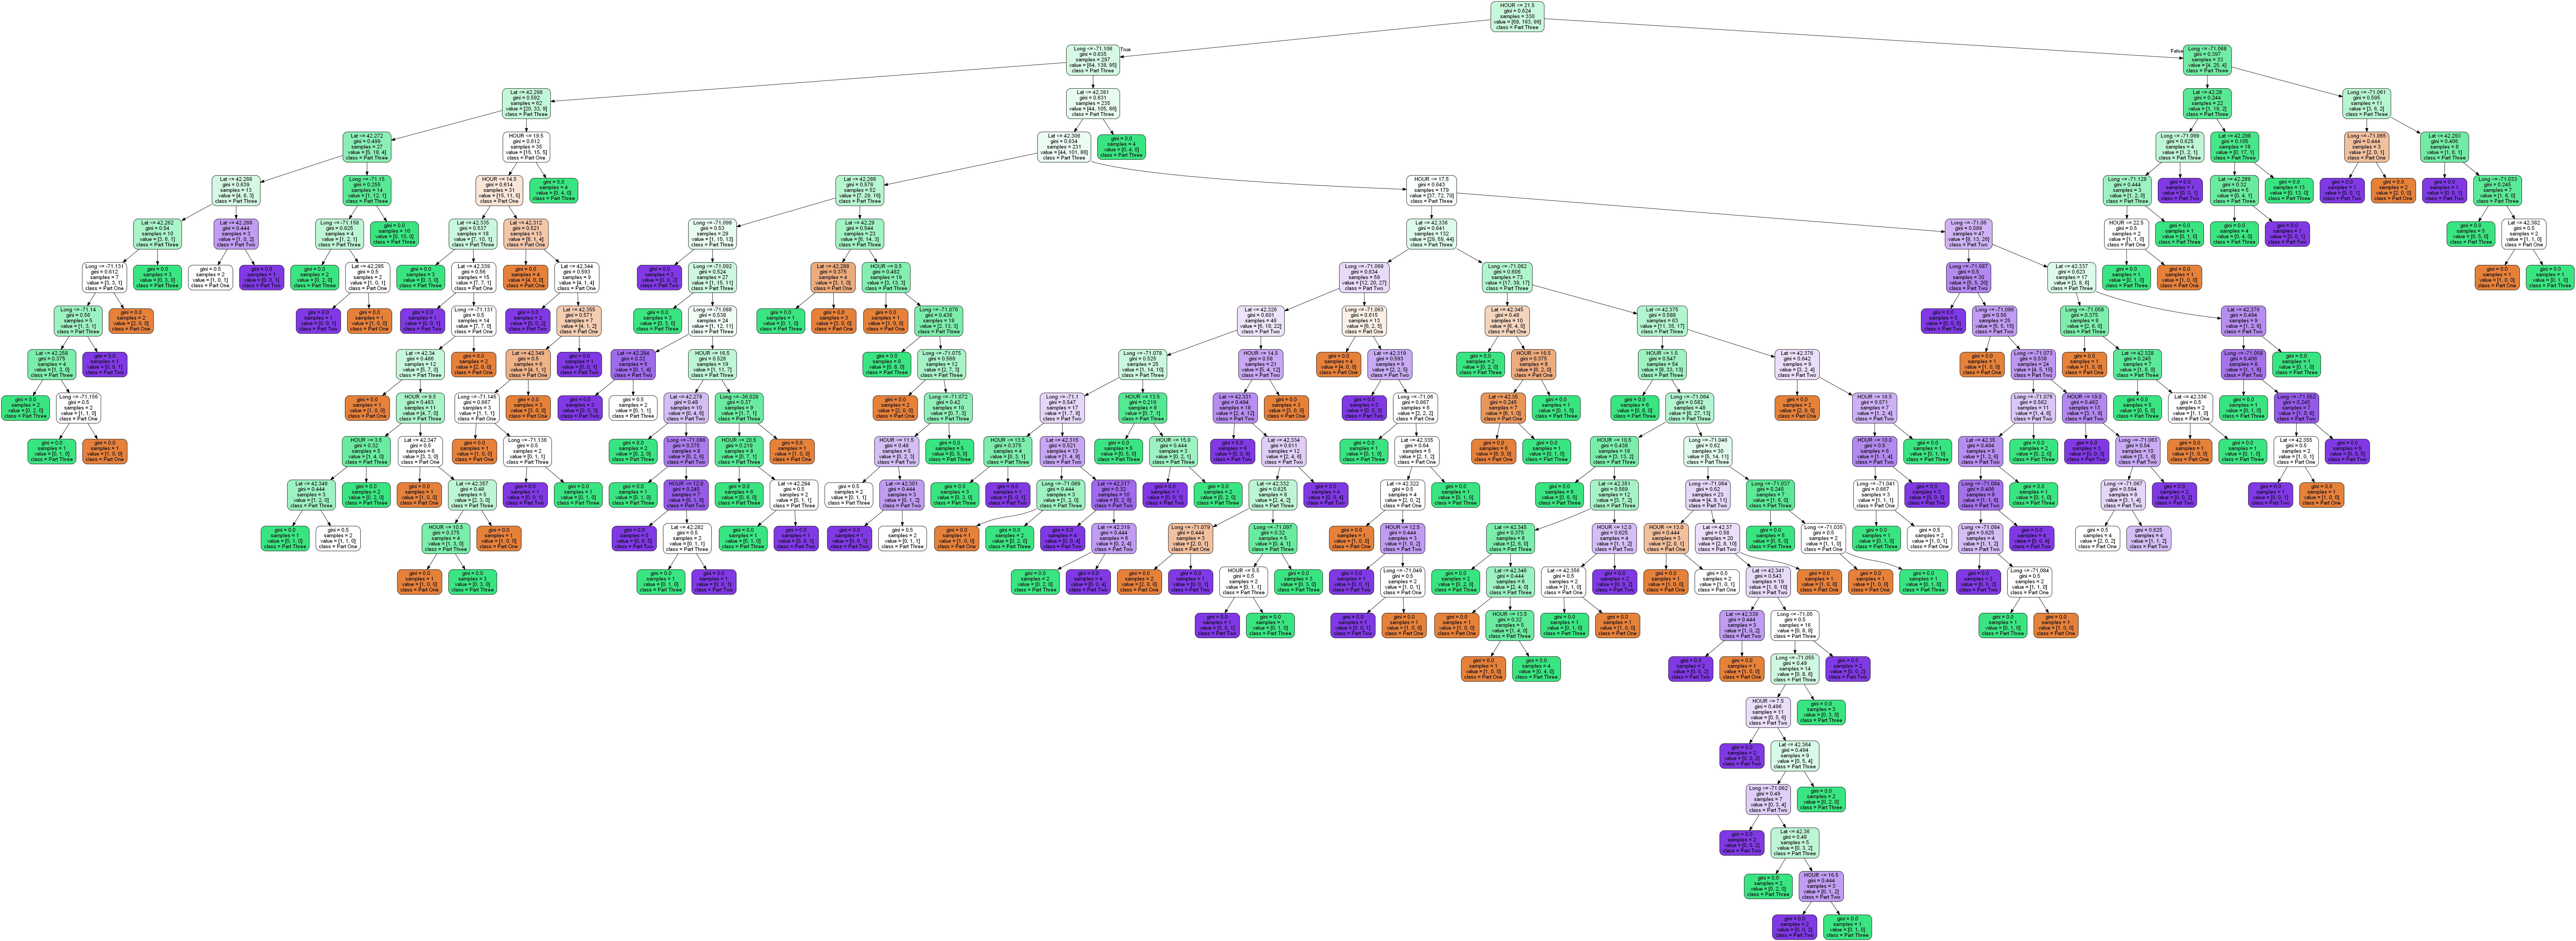

In [213]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True,class_names =dtree.classes_)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [214]:
from sklearn.ensemble import RandomForestClassifier
rfcsimple = RandomForestClassifier(n_estimators=100)
rfcsimple.fit(X_train, y_train)

C:\Users\Dell\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [215]:
rfc_pred = rfc.predict(X_test)

In [216]:
print(confusion_matrix(y_test,rfc_pred))

[[ 0 31  0]
 [ 0 72  0]
 [ 0 39  0]]


In [217]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

    Part One       0.00      0.00      0.00        31
  Part Three       0.51      1.00      0.67        72
    Part Two       0.00      0.00      0.00        39

    accuracy                           0.51       142
   macro avg       0.17      0.33      0.22       142
weighted avg       0.26      0.51      0.34       142



C:\Users\Dell\.conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [218]:
df.corr()

,OFFENSE_CODE,SHOOTING,YEAR,MONTH,HOUR,Lat,Long
OFFENSE_CODE,1.000000,NaN,NaN,-0.130026,0.017129,0.021496,-0.022841
SHOOTING,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,-0.130026,NaN,NaN,1.000000,0.060954,0.341230,-0.342030
HOUR,0.017129,NaN,NaN,0.060954,1.000000,0.027906,-0.029219
Lat,0.021496,NaN,NaN,0.341230,0.027906,1.000000,-0.999873
Long,-0.022841,NaN,NaN,-0.342030,-0.029219,-0.999873,1.000000


In [219]:
larceny=df.loc[df['OFFENSE_CODE_GROUP'] == 'Larceny']
larceny

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,Date,Time
21,I192078622,619,Larceny,LARCENY ALL OTHERS,C6,201,NaN,2019-09-29 03:04:00,2019,9,Sunday,3,Part One,W BROADWAY,42.340070,-71.052794,"(42.34006986, -71.05279420)",2019-09-29,03:04:00
47,I192078594,613,Larceny,LARCENY SHOPLIFTING,D4,619,NaN,2019-09-28 23:57:00,2019,9,Saturday,23,Part One,MASSACHUSETTS AVE,42.344396,-71.086320,"(42.34439568, -71.08632016)",2019-09-28,23:57:00
88,I192078543,613,Larceny,LARCENY SHOPLIFTING,E13,635,NaN,2019-09-28 20:27:00,2019,9,Saturday,20,Part One,CENTRE ST,42.319293,-71.111782,"(42.31929343, -71.11178236)",2019-09-28,20:27:00
94,I192078536,619,Larceny,LARCENY ALL OTHERS,C11,397,NaN,2019-09-28 19:30:00,2019,9,Saturday,19,Part One,CENTRE ST,42.291265,-71.068114,"(42.29126463, -71.06811401)",2019-09-28,19:30:00
96,I192078534,617,Larceny,LARCENY THEFT FROM BUILDING,C11,359,NaN,2019-09-28 19:56:53,2019,9,Saturday,19,Part One,WASHINGTON ST,42.295263,-71.072074,"(42.29526287, -71.07207439)",2019-09-28,19:56:53
97,I192078533,613,Larceny,LARCENY SHOPLIFTING,D4,146,NaN,2019-09-28 19:40:00,2019,9,Saturday,19,Part One,HUNTINGTON AVE,42.347972,-71.078496,"(42.34797240, -71.07849582)",2019-09-28,19:40:00
119,I192078512,619,Larceny,LARCENY ALL OTHERS,D14,793,NaN,2019-09-28 16:58:00,2019,9,Saturday,16,Part One,COMMONWEALTH AVE,42.349897,-71.131434,"(42.34989652, -71.13143450)",2019-09-28,16:58:00
123,I192078506,613,Larceny,LARCENY SHOPLIFTING,C11,450,NaN,2019-09-28 17:34:00,2019,9,Saturday,17,Part One,WASHINGTON ST,42.290575,-71.071657,"(42.29057504, -71.07165726)",2019-09-28,17:34:00
128,I192078501,616,Larceny,LARCENY THEFT OF BICYCLE,C6,233,NaN,2019-09-28 17:37:00,2019,9,Saturday,17,Part One,COLUMBIA RD,42.330550,-71.040608,"(42.33054986, -71.04060752)",2019-09-28,17:37:00
143,I192078484,613,Larceny,LARCENY SHOPLIFTING,B2,603,NaN,2019-09-28 15:26:00,2019,9,Saturday,15,Part One,TREMONT ST,42.333807,-71.103778,"(42.33380683, -71.10377843)",2019-09-28,15:26:00


In [220]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [221]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [222]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.48573267, 0.3269894 , 0.18727793])

In [2]:
df.describe()

,OFFENSE_CODE,SHOOTING,YEAR,MONTH,HOUR,Lat,Long
count,472.000000,0.0,472.0,472.000000,472.000000,472.000000,472.000000
mean,2284.997881,NaN,2019.0,8.993644,13.116525,42.141077,-70.786551
std,1218.047392,NaN,0.0,0.189876,7.035034,2.817391,4.557314
min,111.000000,NaN,2019.0,7.000000,0.000000,-1.000000,-71.168951
25%,802.000000,NaN,2019.0,9.000000,9.000000,42.296239,-71.100820
50%,2907.000000,NaN,2019.0,9.000000,15.000000,42.327533,-71.077390
75%,3301.000000,NaN,2019.0,9.000000,18.000000,42.349715,-71.063450
max,3831.000000,NaN,2019.0,10.000000,23.000000,42.387935,-1.000000
